<a href="https://colab.research.google.com/github/soroush1dft/Discrete-Mathematics-Number-Theory-and-Cryptography/blob/main/Cryptography_Differential_Cryptoanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CipherTwo Encryption
In this Code i want to make a code to decrypt the Ciphertwo.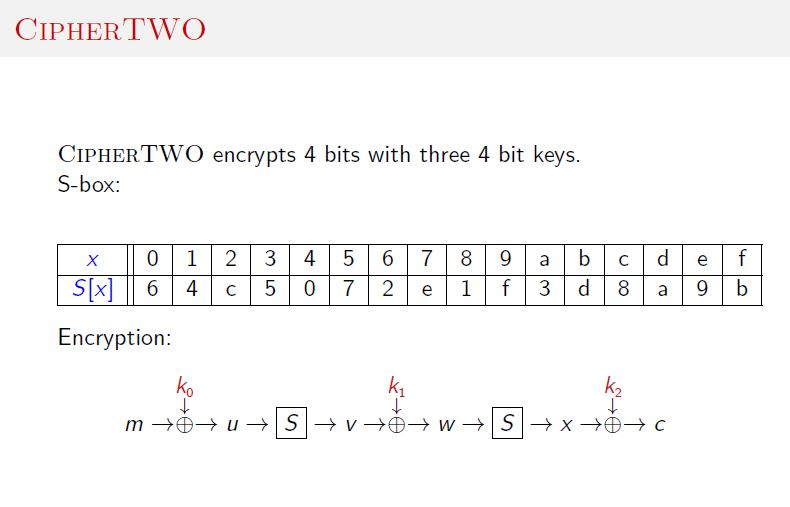

# Sx and inputs
First we need to define the Sx dictionary which defined in lecture slides in to a python dictioanry.

In [ ]:
'''Sx = {
 '0': '6',
 '1': '4',
 '2': 'c',
 '3': '5',
 '4': '0',
 '5': '7',
 '6': '2',
 '7': 'e',
 '8': '1',
 '9': 'f',
 'a': '3',
 'b': 'd',
 'c': '8',
 'd': 'a',
 'e': '9',
 'f': 'b'
}
M_C_tuple1 = ('1' , 'e')
M_C_tuple2 = ('e' , '9')
M_C_tuple3 = ('2' , '6')
M_C_tuple4 = ('d' , 'a')
M_C_tuple5 = ('3' , '7')
M_C_tuple6 = ('c' , 'b')'''
Sx = {
 0: 6,
 1: 4,
 2: 12,
 3: 5,
 4: 0,
 5: 7,
 6: 2,
 7: 14,
 8: 1,
 9: 15,
 10: 3,
 11: 13,
 12: 8,
 13: 10,
 14: 9,
 15: 11
}
M_C_tuple0 = (1, 14) #massage_cipher tuple. we have these tuples in exercise 1 of homework 2
M_C_tuple1 = (14, 9)
M_C_tuple2 = (2, 6)
M_C_tuple3 = (13, 10)
M_C_tuple4 = (3, 7)
M_C_tuple5 = (12, 11)

print(M_C_tuple1[1])

9


In [ ]:
def S_x( X ):
  y = Sx[X]
  return y


def S_x_inverse( Y ):
  keys_of_value = [key for key, value in Sx.items() if value == Y]
  return keys_of_value[0]
S_x_inverse(7)

5

In [ ]:
def Guss_Ki( C):
  Ki = [i for i in range(0,16)]
  Ci = [ i ^ C for i in Ki]

  return Ci

x0 = Guss_Ki(M_C_tuple0[1])
x1 = Guss_Ki(M_C_tuple1[1])
x2 = Guss_Ki(M_C_tuple2[1])
x3 = Guss_Ki(M_C_tuple3[1])
x4 = Guss_Ki(M_C_tuple4[1])
x5 = Guss_Ki(M_C_tuple5[1])

print(x0)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)


[14, 15, 12, 13, 10, 11, 8, 9, 6, 7, 4, 5, 2, 3, 0, 1]
[9, 8, 11, 10, 13, 12, 15, 14, 1, 0, 3, 2, 5, 4, 7, 6]
[6, 7, 4, 5, 2, 3, 0, 1, 14, 15, 12, 13, 10, 11, 8, 9]
[10, 11, 8, 9, 14, 15, 12, 13, 2, 3, 0, 1, 6, 7, 4, 5]
[7, 6, 5, 4, 3, 2, 1, 0, 15, 14, 13, 12, 11, 10, 9, 8]
[11, 10, 9, 8, 15, 14, 13, 12, 3, 2, 1, 0, 7, 6, 5, 4]


In [ ]:
w0 = [S_x_inverse(x0[i]) for i in range(len(x0))]
w1 = [S_x_inverse(x1[i]) for i in range(len(x1))]
w2 = [S_x_inverse(x2[i]) for i in range(len(x2))]
w3 = [S_x_inverse(x3[i]) for i in range(len(x3))]
w4 = [S_x_inverse(x4[i]) for i in range(len(x4))]
w5 = [S_x_inverse(x5[i]) for i in range(len(x5))]

print(w0)
print(w1)
print(w2)
print(w3)
print(w4)
print(w5)

[7, 9, 2, 11, 13, 15, 12, 14, 0, 5, 1, 3, 6, 10, 4, 8]
[14, 12, 15, 13, 11, 2, 9, 7, 8, 4, 10, 6, 3, 1, 5, 0]
[0, 5, 1, 3, 6, 10, 4, 8, 7, 9, 2, 11, 13, 15, 12, 14]
[13, 15, 12, 14, 7, 9, 2, 11, 6, 10, 4, 8, 0, 5, 1, 3]
[5, 0, 3, 1, 10, 6, 8, 4, 9, 7, 11, 2, 15, 13, 14, 12]
[15, 13, 14, 12, 9, 7, 11, 2, 10, 6, 8, 4, 5, 0, 3, 1]


In [ ]:
w0_xor_w1= [i ^ j for i, j in zip( w0, w1)]
w2_xor_w3 = [i ^ j for i, j in zip(w2, w3)]
w4_xor_w5 = [i ^ j for i, j in zip(w4, w5)]

print(w0_xor_w1)
print(w2_xor_w3)
print(w4_xor_w5)

[9, 5, 13, 6, 6, 13, 5, 9, 8, 1, 11, 5, 5, 11, 1, 8]
[13, 10, 13, 13, 1, 3, 6, 3, 1, 3, 6, 3, 13, 10, 13, 13]
[10, 13, 13, 13, 3, 1, 3, 6, 3, 1, 3, 6, 10, 13, 13, 13]


In [ ]:
alf = [w0_xor_w1[i] ^ w2_xor_w3[i] for i in range(len(w0_xor_w1))]

[4, 15, 0, 11, 7, 14, 3, 10, 9, 2, 13, 6, 8, 1, 12, 5]

In [ ]:
same_numbers = [w0_xor_w1[i] for i in range(len(w0_xor_w1)) if w0_xor_w1[i] == w2_xor_w3[i] == w4_xor_w5[i]]

same_numbers

[13]

In [ ]:
# Finding the index of the number that is the same in all three lists
same_number_index = [i for i in range(len(w0_xor_w1))
                     if w0_xor_w1[i] == w2_xor_w3[i] == w4_xor_w5[i]]

same_number_index

[2]

In [ ]:
def same_number_finder(A, B, C):
  same_num = [A[i] for i in range(len(A)) if A[i] == B[i] == C[i]]
  return same_num

which means last key(k2) equals to 2.

now we have to calculate real x, for each Cipher text:

In [ ]:
x_of_M_C_tuple0 = M_C_tuple0[1] ^ 2
x_of_M_C_tuple1 = M_C_tuple1[1] ^ 2
x_of_M_C_tuple2 = M_C_tuple2[1] ^ 2
x_of_M_C_tuple3 = M_C_tuple3[1] ^ 2
x_of_M_C_tuple4 = M_C_tuple4[1] ^ 2
x_of_M_C_tuple5 = M_C_tuple5[1] ^ 2

print("x_of_M_C_tuple0:", x_of_M_C_tuple0)
print("x_of_M_C_tuple1:", x_of_M_C_tuple1)
print("x_of_M_C_tuple2:", x_of_M_C_tuple2)
print("x_of_M_C_tuple3:", x_of_M_C_tuple3)
print("x_of_M_C_tuple4:", x_of_M_C_tuple4)
print("x_of_M_C_tuple5:", x_of_M_C_tuple5)

x_of_M_C_tuple0: 12
x_of_M_C_tuple1: 11
x_of_M_C_tuple2: 4
x_of_M_C_tuple3: 8
x_of_M_C_tuple4: 5
x_of_M_C_tuple5: 9


In [ ]:
exact_w0 = S_x_inverse(x_of_M_C_tuple0)
exact_w1 = S_x_inverse(x_of_M_C_tuple1)
exact_w2 = S_x_inverse(x_of_M_C_tuple2)
exact_w3 = S_x_inverse(x_of_M_C_tuple3)
exact_w4 = S_x_inverse(x_of_M_C_tuple4)
exact_w5 = S_x_inverse(x_of_M_C_tuple5)

print("exact_w0:", exact_w0)
print("exact_w1:", exact_w1)
print("exact_w2:", exact_w2)
print("exact_w3:", exact_w3)
print("exact_w4:", exact_w4)

exact_w0: 2
exact_w1: 15
exact_w2: 1
exact_w3: 12
exact_w4: 3
exact_w5: 14


In [ ]:
exact_w0_xor_w1 = exact_w0 ^ exact_w1
exact_w2_xor_w3 = exact_w2 ^ exact_w3
exact_w4_xor_w5 = exact_w4 ^ exact_w5

print(exact_w0_xor_w1)
print(exact_w2_xor_w3)
print(exact_w4_xor_w5)

13
13
13


In [ ]:
v_prime0 = Guss_Ki(exact_w0)
v_prime1 = Guss_Ki(exact_w1)
v_prime2 = Guss_Ki(exact_w2)
v_prime3 = Guss_Ki(exact_w3)
v_prime4 = Guss_Ki(exact_w4)
v_prime5 = Guss_Ki(exact_w5)

print("v_prime0:", v_prime0)
print("v_prime1:", v_prime1)
print("v_prime2:", v_prime2)
print("v_prime3:", v_prime3)
print("v_prime4:", v_prime4)
print("v_prime5:", v_prime5)

v_prime0: [2, 3, 0, 1, 6, 7, 4, 5, 10, 11, 8, 9, 14, 15, 12, 13]
v_prime1: [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
v_prime2: [1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14]
v_prime3: [12, 13, 14, 15, 8, 9, 10, 11, 4, 5, 6, 7, 0, 1, 2, 3]
v_prime4: [3, 2, 1, 0, 7, 6, 5, 4, 11, 10, 9, 8, 15, 14, 13, 12]
v_prime5: [14, 15, 12, 13, 10, 11, 8, 9, 6, 7, 4, 5, 2, 3, 0, 1]


In [ ]:
u_prime_0 = [S_x_inverse(v_prime0[i]) for i in range(len(v_prime0))]
u_prime_1 = [S_x_inverse(v_prime1[i]) for i in range(len(v_prime1))]
u_prime_2 = [S_x_inverse(v_prime2[i]) for i in range(len(v_prime2))]
u_prime_3 = [S_x_inverse(v_prime3[i]) for i in range(len(v_prime3))]
u_prime_4 = [S_x_inverse(v_prime4[i]) for i in range(len(v_prime4))]
u_prime_5 = [S_x_inverse(v_prime5[i]) for i in range(len(v_prime5))]

print("u_prime_0:", u_prime_0)
print("u_prime_1:", u_prime_1)
print("u_prime_2:", u_prime_2)
print("u_prime_3:", u_prime_3)
print("u_prime_4:", u_prime_4)
print("u_prime_5:", u_prime_5)

u_prime_0: [6, 10, 4, 8, 0, 5, 1, 3, 13, 15, 12, 14, 7, 9, 2, 11]
u_prime_1: [9, 7, 11, 2, 15, 13, 14, 12, 5, 0, 3, 1, 10, 6, 8, 4]
u_prime_2: [8, 4, 10, 6, 3, 1, 5, 0, 14, 12, 15, 13, 11, 2, 9, 7]
u_prime_3: [2, 11, 7, 9, 12, 14, 13, 15, 1, 3, 0, 5, 4, 8, 6, 10]
u_prime_4: [10, 6, 8, 4, 5, 0, 3, 1, 15, 13, 14, 12, 9, 7, 11, 2]
u_prime_5: [7, 9, 2, 11, 13, 15, 12, 14, 0, 5, 1, 3, 6, 10, 4, 8]


In [ ]:
u0_xor_u1= [i ^ j for i, j in zip(u_prime_0, u_prime_1)]
u2_xor_u3 = [i ^ j for i, j in zip(u_prime_1, u_prime_2)]
u4_xor_u5 = [i ^ j for i, j in zip(u_prime_3, u_prime_4)]

print("u0_xor_u1:", u0_xor_u1)
print("u2_xor_u3:", u2_xor_u3)
print("u4_xor_u5:", u4_xor_u5)

u0_xor_u1: [15, 13, 15, 10, 15, 8, 15, 15, 8, 15, 15, 15, 13, 15, 10, 15]
u2_xor_u3: [1, 3, 1, 4, 12, 12, 11, 12, 11, 12, 12, 12, 1, 4, 1, 3]
u4_xor_u5: [8, 13, 15, 13, 9, 14, 14, 14, 14, 14, 14, 9, 13, 15, 13, 8]


In [ ]:
same_number_finder(u0_xor_u1,u2_xor_u3,u4_xor_u5)

[]

In [ ]:
exact_v0 = exact_w0 ^ 1
exact_v1 = exact_w1 ^ 1
exact_v2 = exact_w2 ^ 1
exact_v3 = exact_w3 ^ 1
exact_v4 = exact_w4 ^ 1
exact_v5 = exact_w5 ^ 1

print("exact_v0:", exact_v0)
print("exact_v1:", exact_v1)
print("exact_v2:", exact_v2)
print("exact_v3:", exact_v3)
print("exact_v4:", exact_v4)
print("exact_v5:", exact_v5)

exact_v0: 3
exact_v1: 14
exact_v2: 0
exact_v3: 13
exact_v4: 2
exact_v5: 15


In [ ]:
exact_u0 = S_x_inverse(exact_v0)
exact_u1 = S_x_inverse(exact_v1)
exact_u2 = S_x_inverse(exact_v2)
exact_u3 = S_x_inverse(exact_v3)
exact_u4 = S_x_inverse(exact_v4)
exact_u5 = S_x_inverse(exact_v5)

# Printing the results
print("exact_u0:", exact_u0)
print("exact_u1:", exact_u1)
print("exact_u2:", exact_u2)
print("exact_u3:", exact_u3)
print("exact_u4:", exact_u4)
print("exact_u5:", exact_u5)

exact_u0: 10
exact_u1: 7
exact_u2: 4
exact_u3: 11
exact_u4: 6
exact_u5: 9


In [ ]:
# Applying Guss_Ki to all exact_u variables
m_prime0 = Guss_Ki(exact_u0)
m_prime1 = Guss_Ki(exact_u1)
m_prime2 = Guss_Ki(exact_u2)
m_prime3 = Guss_Ki(exact_u3)
m_prime4 = Guss_Ki(exact_u4)
m_prime5 = Guss_Ki(exact_u5)

# Printing the results
print("m_prime0:", m_prime0)
print("m_prime1:", m_prime1)
print("m_prime2:", m_prime2)
print("m_prime3:", m_prime3)
print("m_prime4:", m_prime4)
print("m_prime5:", m_prime5)
